In [4]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [7]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
data = iris.data
label = iris.target
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

scaler = StandardScaler()
scaler.fit(x_train)

x_train_ = scaler.transform(x_train)
x_test_  = scaler.transform(x_test)

model = KNeighborsClassifier()
model.fit(x_train_, y_train)
y_pred = model.predict(x_test_)

train_scores = model.score(x_train_, y_train)
test_scores = model.score(x_test_, y_test)

print("Train Score", train_scores)
print("Test Score", test_scores)

Train Score 0.9583333333333334
Test Score 0.9


In [24]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=data, y=label,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.4s finished


{'fit_time': array([0.00070381, 0.00068998, 0.00071287, 0.00071979, 0.00071907]),
 'score_time': array([0.00190592, 0.002074  , 0.0019424 , 0.00195551, 0.00193882]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [27]:
params = [{'n_neighbors': [3,5,7],
          'weights': ['uniform', 'distance'],
          'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)
grid_knn.fit(data, label)
print("The best param is", grid_knn.best_params_)
print("The best socre is", grid_knn.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best param is {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
The best socre is 0.9800000000000001


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done  90 out of  90 | elapsed:    0.2s finished


In [51]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    out = plt.contourf(xx, yy, z, **params)
    return out

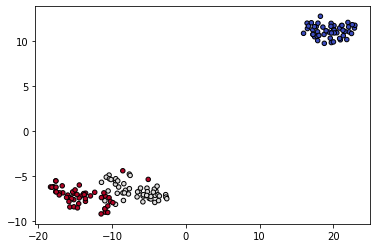

In [52]:
tsne = TSNE(n_components=2)
x_comp = tsne.fit_transform(data)
plt.scatter(x_comp[:,0], x_comp[:,1],
           c=label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

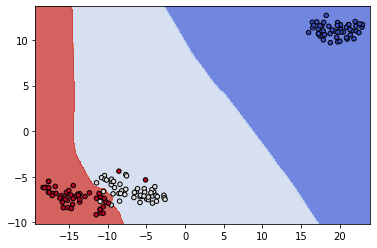

In [53]:
model = KNeighborsClassifier()
model.fit(x_comp, label)
predict = model.predict(x_comp)
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_comp[:,0], x_comp[:,1], c=label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()